# Multilayer ANN
We can make the network slightly larger by (1) adding more computation units in the layers and (2) adding more layers. We can modify our network by editing how we specified the layers in the previous example.

In [1]:
import torch
import torch.nn as nn

In [2]:
model = nn.Sequential(
            nn.Linear(1,8),
            nn.ReLU(),
            nn.Linear(8,4),
            nn.Sigmoid(),
            nn.Linear(4,1),
        )

Here, we have defined an input layer that takes one input and forwards it to the layer with eight units. This is followed by ReLU activation function before moving to a layer with eight units, which then forwards to another layer with four units. This is followed by sigmoid activation, which forwards to the output layer with one unit.

We can modify the output layer to contain more than one unit if required. Let’s work on a multiclass classification problem we’ve seen before. Iris dataset contains elements from three species of Iris flowers. We can create three units in the output layer that will supposedly indicate the probability of an Iris sample falling in one of the three categories.

Let’s import the Iris dataset the way we’ve been doing before.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [5]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target

x = df.drop(labels='class', axis=1).astype(np.float32).values
y = df['class'].astype(np.float32).values

We now need to convert x and y to tensors. This can be done using `torch.tensor()`. Note that we’ll also convert the tensors to required data types so that we don’t have data
format–related issues in the later stages.

In [6]:
data = torch.tensor( x ).float()
labels = torch.tensor( y ).long()

print (data.size())

torch.Size([150, 4])


In [7]:
print (labels.size())

torch.Size([150])


We’ll now define a simple neural network that accepts four inputs, 16 units in the hidden layer, and three units in the output. All the activations will be ReLU. A schematic
diagram for this network is shown below:

![multilayer-ann](images/multilayer-ann.png)

In [10]:
model = nn.Sequential(
            nn.Linear(4,16),
            nn.ReLU(),
            nn.Linear(16,16),
            nn.ReLU(),
            nn.Linear(16,3),
        )

# Define loss function and optimizer
crossentropyloss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

Now we can initiate the training loop. In this example, we will train for 1000 iterations, or 1000 epochs. Just like the previous example, we’ll keep a track of the losses to visualize the learning process. We’ll also compute accuracy by comparing the predictions of the model with the values in the original dataset and keep a record of these for visualizations.

In [11]:
epoch_count = 1000
losses = []
accuracy = []

for epoch in range(epoch_count):
    preds = model(data)
    loss = crossentropyloss(preds, labels)
    losses.append(loss.detach())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = (torch.argmax(preds, axis=1) == labels).float()
    matchesNumeric = matches.float()
    accuracyPct = 100 * torch.mean(matches)
    accuracy.append(accuracyPct)

After 1000 iterations, we assume the loss to have sufficiently reduced and accuracies to be consistent. Let’s plot the two:

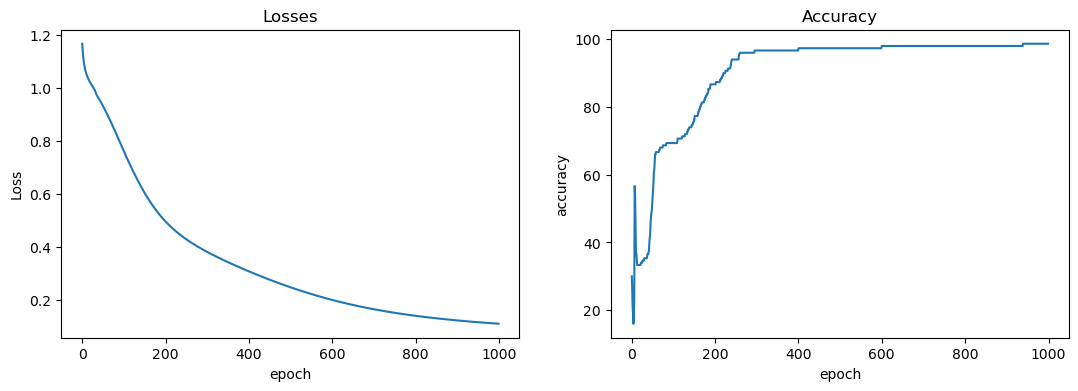

In [12]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 2, figsize=(13,4))
ax[0].plot(losses)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(accuracy)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

shows the gradual decline of losses that almost didn’t vary enough beyond the 800th epoch. The accuracy chart shows a steep increase of accuracy in the initial epochs, which also reached a sufficiently high rate.

To monitor the accuracy, let’s find the predictions again for the final model and compare with the original values:

In [13]:
predictions = model(data)
predlabels = torch.argmax(predictions,axis=1)
final_accuracy = 100*torch.mean((predlabels == labels).float())

final_accuracy

tensor(98.6667)

We’ve achieved sufficiently good accuracy. However, rather than ending this experiment here, it will be an interesting idea to understand what kind of decision boundaries are created in such a network. This might reveal more insight about how ANNs create boundaries. We will create a new program for this so that the model is created based on two
dimensions of the data (instead of four). Here’s the complete code:

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import torch, torch.nn as nn
from matplotlib.colors import ListedColormap

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
x = df.drop(labels='class', axis=1).astype(np.float32).values
y = df['class'].astype(np.float32).values

data = torch.tensor( x[:,1:3] ).float()
labels = torch.tensor( y ).long()
model = nn.Sequential(
            nn.Linear(2,128), # input layer
            nn.ReLU(), # activation
            nn.Linear(128, 128), # hidden layer
            nn.Sigmoid(), # activation
            nn.Linear(128,3), # output layer
        )
        
crossentropyloss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

maxiter = 1000
for epochi in range(maxiter):
    preds = model(data)
    loss = crossentropyloss(preds,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

At this point, the model has been trained, and we can continue preparing a two-dimensional space for plotting a contour plot that will show the decision boundaries
based on how the model labels each point.

C:\Users\dm\AppData\Local\Temp\ipykernel_7676\2562874016.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3281.)
  Z = predlabels.T
C:\Users\dm\AppData\Local\Temp\ipykernel_7676\2562874016.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y == cl, 1], y=x[y == cl, 2], c=colors[idx], marker=markers[idx], alpha=0.5, label=cl, edgecolor='black')


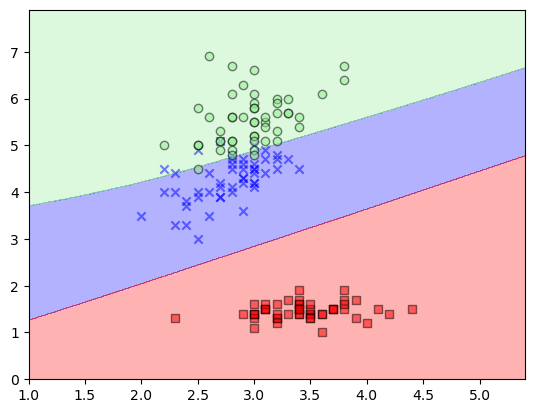

In [16]:
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
predictions = model(torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).astype(np.float32)).T)
predlabels = torch.argmax(predictions,axis=1)

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

Z = predlabels.T
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 1], y=x[y == cl, 2], c=colors[idx], marker=markers[idx], alpha=0.5, label=cl, edgecolor='black')

### NN Class in PyTorch
In the previous examples, we have always defined the structure of neural network using `nn.Sequential()`, which allows us to define how layers and activations are connected
to each other. Another way of defining a network is a neural network class that inherits `nn.Module` and defines the layers that will be used and implements a method to define
how forward propagation occurs. This is specifically useful when you want to model a complex model instead of a simple sequence of existing modules.

Let’s prepare data for classification using sklearn’s make_classification() method to create two distinct clusters.

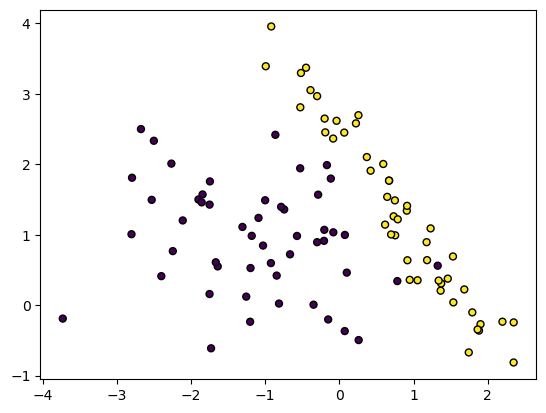

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=15)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

We’ll now define a simple neural network with an input layer that accepts two inputs: a hidden layer with eight nodes and an output layer with one node denoting the class (0 or 1).

In [20]:
import torch, torch.nn as nn, torch.nn.functional as F
import numpy as np

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2,8)
        self.hidden = nn.Linear(8,8)
        self.output = nn.Linear(8,1)

    def forward(self,x):
        x = self.input(x)
        x = F.relu(x)
        x = self.hidden(x)
        x = F.relu(x)
        x = self.output(x)
        x = torch.sigmoid(x)
        
        return x

In [21]:
mymodel = MyNetwork()

data = torch.tensor(X.astype(np.float32))
labels = torch.tensor(y.reshape(1,100).T.astype(np.float32))

lossfun = nn.MSELoss()
learningRate = .05
optimizer = torch.optim.SGD(mymodel.parameters(), lr=learningRate)

numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    yHat = mymodel(data)
    loss = lossfun(yHat,labels)
    losses[epochi] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

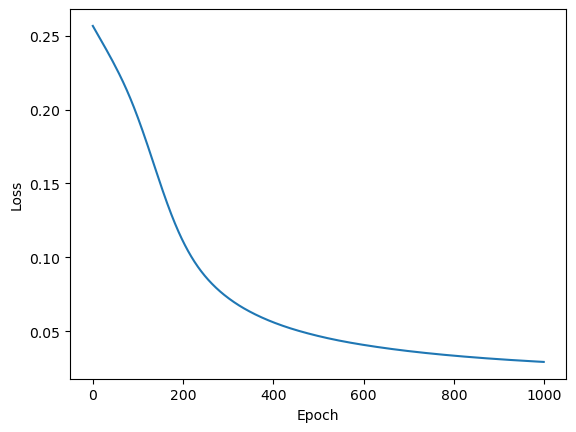

In [22]:
# show the losses
plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Overfitting and Dropouts
Just like we saw previously, overfitting is a common problem in ML tasks where a model might learn too much from the training dataset and might not generalize well. This is true in neural networks as well, and due to flexible nature, neural networks are susceptible to overfitting. There are, in general, two solutions to overfitting. `One is to use a sufficiently large number of training data examples`. `The second method requires modifying how complex a network is in terms of network structures and network parameters`. You may reduce some layers in the model or reduce the number of computation nodes in each layer. Another popular method used in neural networks is called `dropouts`. You can define
dropout at a certain layer so that the model will randomly deliberately ignore some of the nodes during training, thus causing those nodes to drop out – and thus, not able to
learn “too much” from the training data samples.

Because dropout means less computation, the training process becomes faster, though you might require more training epochs to ensure that the losses are low enough. This method of using dropouts has proven to be effective in reducing overfitting to complex image classification and natural language processing problems. In PyTorch, dropout can be defined with a probability of dropout.

In the NN class, we can add the dropout layers in the forward propagation definition with a predefined dropout rate of 20%. See the changes in the following code:

In [ ]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2,8)
        self.hidden = nn.Linear(8,8)
        self.output = nn.Linear(8,1)
        
    def forward(self,x):
        x = self.input(x)
        x = F.relu( x )
        x = F.dropout(x,p=0.2)
        x = self.hidden(x)
        x = F.relu(x)
        x = F.dropout(x,p=0.2)
        x = self.output(x)
        x = torch.sigmoid(x)
        return x

If you keep a track of losses, you will see that the losses don’t reduce smoothly, we eventually find that the loss reduces as we train the network for more and more epochs, and it is possible that the network will be trained with sufficiently usable loss after a certain number of epochs.